In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = np.array(df.loc[:,df.columns!='output'])
y = np.array(df['output'])

print(f'X: {X.shape}, y: {y.shape}')


X: (303, 13), y: (303,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [25]:
class NN:
    def __init__(self,LR,X_train,y_train,X_test,y_test):
        self.w = np.random.randn(X_train_scale.shape[1])
        self.b = np.random.randn()
        self.LR = LR
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.l_train = []
        self.l_test = []

    def activation(self, x):
        return 1/(1+np.exp(-x))


    def derivative(self ,x):
        #derivative
        return self.activation(x) * (1-self.activation(x))

    def forward(self, x):
        hidden_1 = np.dot(x, self.w) + self.b
        activate_1 = self.activation(hidden_1)
        return activate_1
    
    def backward(self, x, y_true):
        # calc gradient
        hidden_1 = np.dot(x, self.w) + self.b
        y_pred = self.forward(x)
        dL_dPred = 2 * (y_pred - y_true)
        dpred_dhidden1 = self.derivative(hidden_1)
        dHidden_db = 1
        dHidden_dw = x

        dL_db = dL_dPred * dpred_dhidden1 * dHidden_db
        dL_dw = dL_dPred * dpred_dhidden1 * dHidden_dw

        return dL_db,dL_dw
    
    def optimizer(self, dL_db, dL_dw):
        self.b = self.b - dL_db * self.LR
        self.w = self.w - dL_dw * self.LR

    def train(self, ITERATIONS):
        for i in range(ITERATIONS):
            # random 
            random_pos = np.random.randint(len(self.X_train))
            # forward pass 
            y_train_true = self.y_train[random_pos]
            y_train_pred = self.forward(self.X_train[random_pos])
            # loss 
            L = np.sum(np.square(y_train_pred-y_train_true))
            self.l_train.append(L)
            # calculate gradient
            dL_db, dL_dw = self.backward(self.X_train[random_pos], y_train[random_pos])
            # update weights
            self.optimizer(dL_db,dL_dw)

            # calc error for test data
            L_sum = 0
            for j in range(len(self.X_test)):
                y_true = self.y_test[j]
                y_pred = self.forward(self.X_test[j])
                L_sum += np.square(y_pred-y_true)
            self.l_test.append(L_sum)

        return "training done"


In [71]:
LR = 0.56
ITERATIONS=1000

nn= NN(LR+LR,X_train=X_test_scale,y_train=y_train,X_test=X_test_scale,y_test=y_test)
nn.train(ITERATIONS)

'training done'

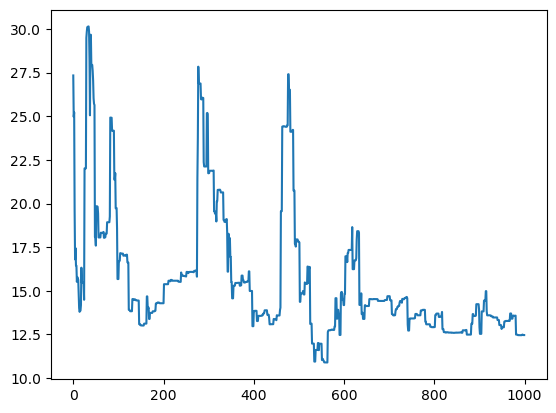

In [72]:
sns.lineplot(x = list(range(len(nn.l_test))), y= nn.l_test);

In [73]:
total_obs = X_test_scale.shape[0]
correct_pred = 0
y_preds = []

for i in range(total_obs):
    y_true = y_test[i]
    y_pred = np.round(nn.forward(X_test_scale[i]))
    y_preds.append(y_pred)
    correct_pred += 1 if y_true == y_pred else 0
    

In [74]:
correct_pred / total_obs * 100

75.40983606557377

In [75]:
from collections import Counter
Counter(y_test)

Counter({1: 31, 0: 30})

In [76]:
Counter(y_preds)

Counter({1.0: 32, 0.0: 29})

In [77]:
confusion_matrix(y_true=y_test,y_pred=y_preds)

array([[22,  8],
       [ 7, 24]], dtype=int64)